[作業目標]
利用範例的創建方式, 創建一組資料, 並練習如何取出最大值
[作業重點]
練習創立 DataFrame (In[2])
如何取出口數最多的國家 (In[3], Out[3])
練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家
Hints: 隨機產生數值: https://blog.csdn.net/christianashannon/article/details/78867204

In [3]:
import pandas as pd
import numpy as np

In [14]:
country =["TW" , "US" , "JP"]
population = [ 2400 , 33000 , 12600]
dic = {'國家': country ,
        '人口(萬)': population
       }
df = pd.DataFrame(dic)
print(df)

   國家  人口(萬)
0  TW   2400
1  US  33000
2  JP  12600


In [21]:
df.loc[df['人口(萬)'].idxmax()]

國家          US
人口(萬)    33000
Name: 1, dtype: object

In [17]:
data1 = {'國家':["x","y","z"] , 
         '人口' : np.random.randint(100,high = 878, size = 3)
        }
df1 =pd.DataFrame(data1) 
print(df1)

  國家   人口
0  x  582
1  y  457
2  z  578


In [19]:
df1.loc[df1['人口'].idxmax()]

國家      x
人口    582
Name: 0, dtype: object

In [24]:
print ("--------------------------------")

--------------------------------


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [28]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入

target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"


In [56]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [57]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [80]:
import pandas as pd
arrange_data= [link.split('\t') for link in data]
df = pd.DataFrame(arrange_data, columns=['id', 'link'])
df.head()

,id,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

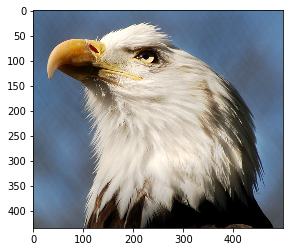

In [95]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [96]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
        except :
            pass
        else:
            img_list.append(img)
        print("Image url\t"+ url)
            
    
    return img_list

Image url	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
Image url	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
Image url	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
Image url	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
Image url	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Image url	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
Image url	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
Image url	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
Image url	http://www.porschemania.it/discus/messages/815/102099.jpg
Image url	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
Total images that we got: 5 


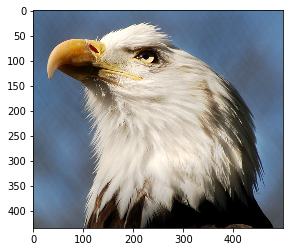

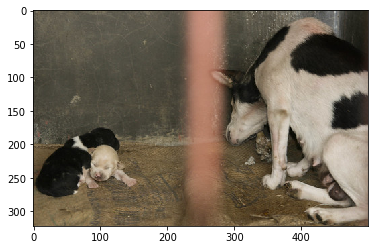

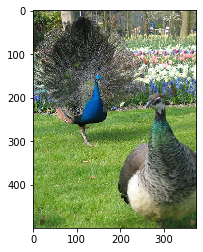

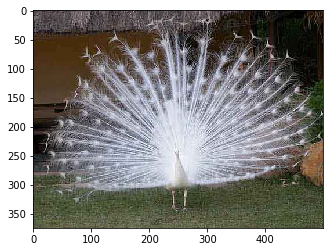

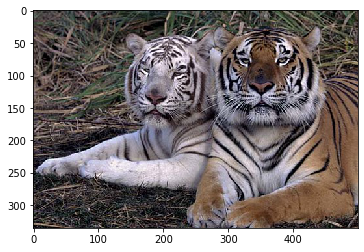

In [99]:
result = img2arr_fromURLs(df['link'][0:10].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()